# Import Library

In [18]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

random_state = 42

# Read data and reshape
- format max size 255
- deploy list
- classification to 10type classes
- split dataes

In [19]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [20]:
# Define labels
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

# Check Datas

In [62]:
# check data size
x_train.shape

(40000, 32, 32, 3)

In [22]:
np.argmax(y_train[1])

2

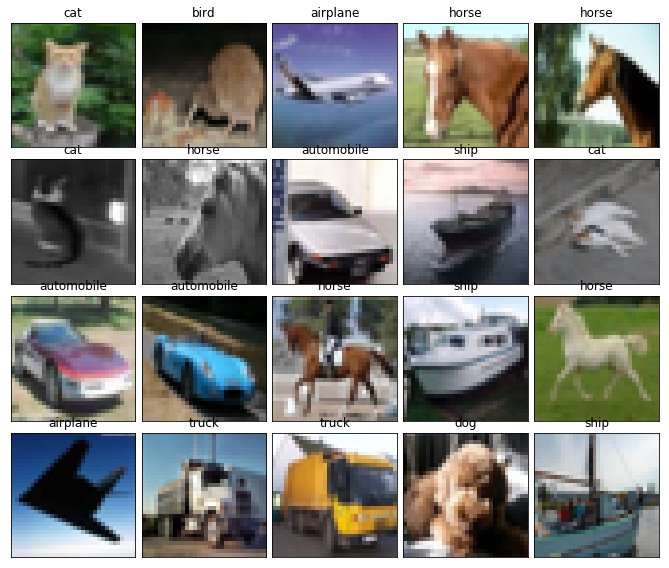

In [23]:
# check images
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    plt.title(cifar10_labels[np.argmax(y_train[i])])

# Model

In [24]:
kernel_size = (3,3)
pool_size = (2,2)

model = Sequential()

model.add(Conv2D(16, kernel_size=kernel_size, activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6

model.add(Conv2D(32, kernel_size=kernel_size, activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120

model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
early_stopping = EarlyStopping(patience=1, verbose=1)
fit = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
40000/40000 [==============================] - 8s 193us/sample - loss: 1.6722 - acc: 0.3950 - val_loss: 1.4594 - val_acc: 0.4720
Epoch 2/10
40000/40000 [==============================] - 8s 190us/sample - loss: 1.3201 - acc: 0.5286 - val_loss: 1.2607 - val_acc: 0.5496
Epoch 3/10
40000/40000 [==============================] - 8s 190us/sample - loss: 1.1823 - acc: 0.5807 - val_loss: 1.2228 - val_acc: 0.5725
Epoch 4/10
40000/40000 [==============================] - 8s 192us/sample - loss: 1.1008 - acc: 0.6108 - val_loss: 1.1330 - val_acc: 0.6045
Epoch 5/10
40000/40000 [==============================] - 8s 196us/sample - loss: 1.0272 - acc: 0.6382 - val_loss: 1.0914 - val_acc: 0.6149
Epoch 6/10
40000/40000 [==============================] - 8s 194us/sample - loss: 0.9745 - acc: 0.6608 - val_loss: 1.0927 - val_acc: 0.6190
Epoch 00006: early stopping


## Plot learning history

In [26]:
# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

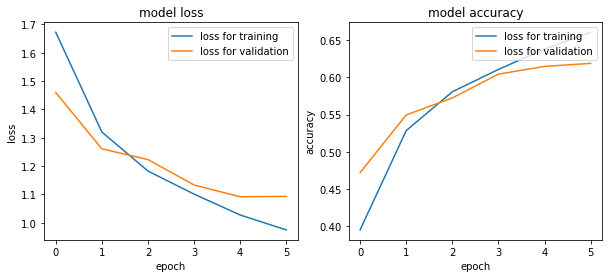

In [27]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit)
plot_history_acc(fit)
# fig.savefig('./Cifar10_learning.png')

# Save trained model

In [28]:
model.save('./cifar10_cnn.h5')

from tensorflow.keras.models import load_model

model = load_model('./cifar10_cnn.h5')

# Predict

In [65]:
x_valid.shape

(10000, 32, 32, 3)

<Figure size 648x1080 with 0 Axes>

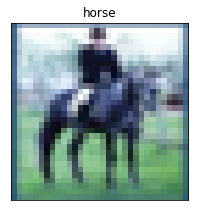

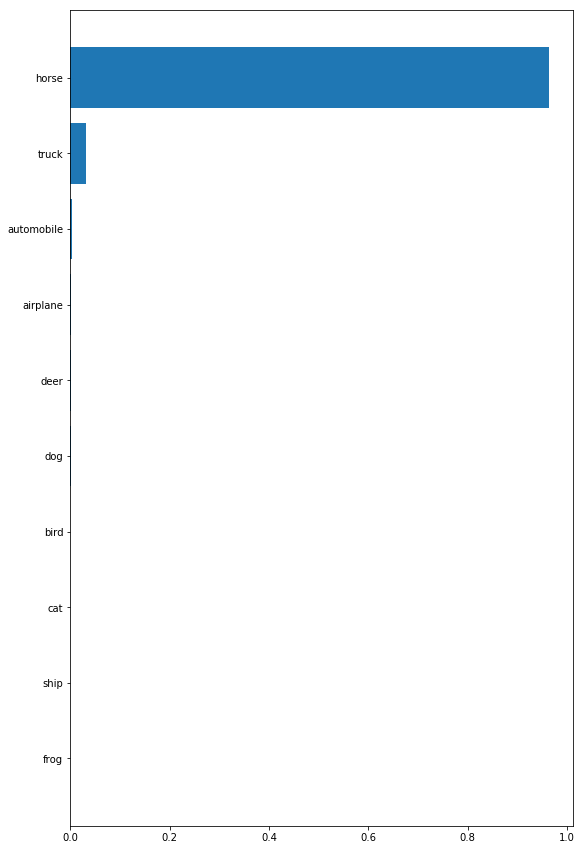

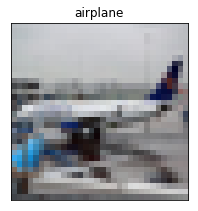

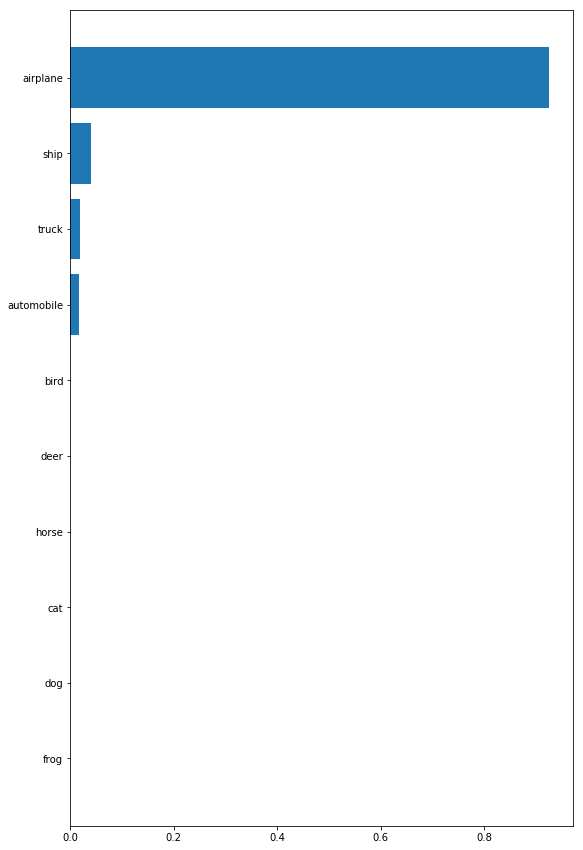

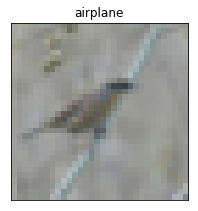

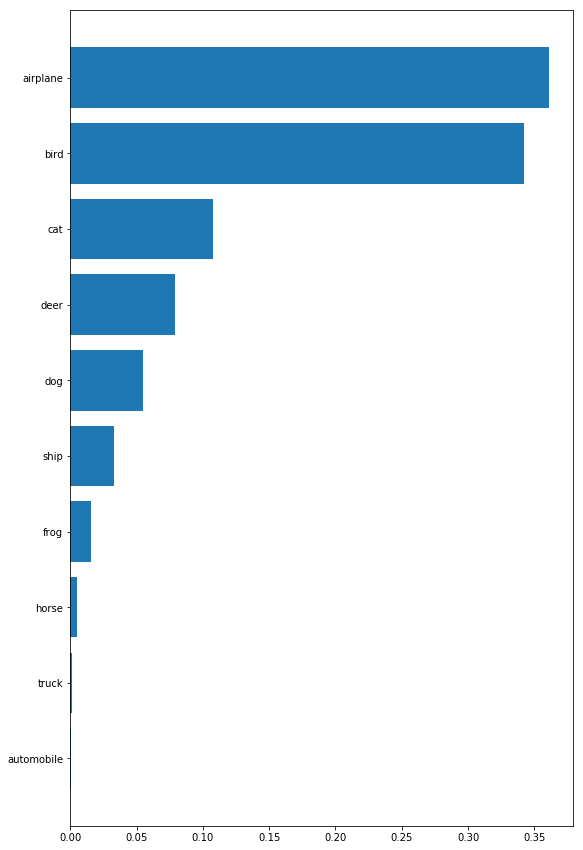

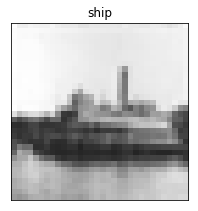

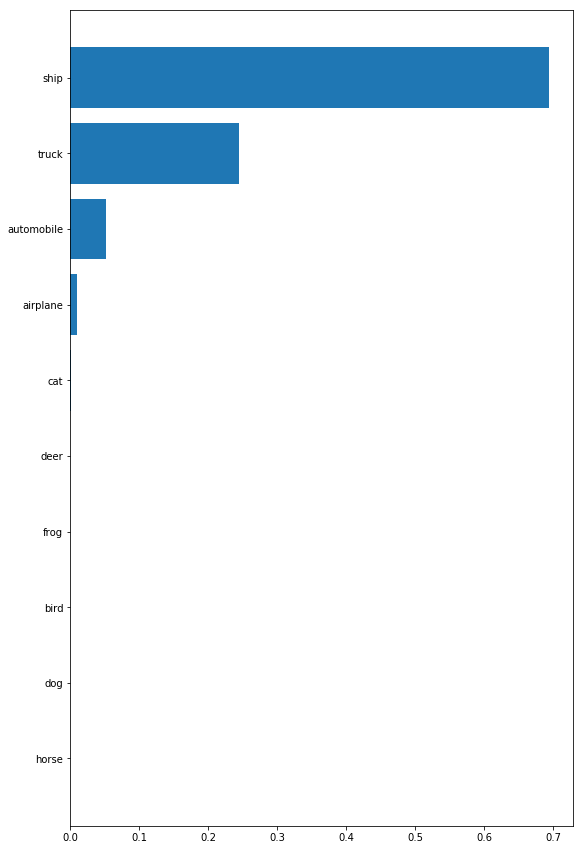

In [29]:
ｓy_proba = model.predict_proba(x_valid)
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

num = 4
for i in range(num):
    fig = plt.figure(figsize=(9, 15))
    y = y_pred[i].argmax()
    ax = fig.add_subplot(num,1, i+1, xticks=[], yticks=[])
    ax.imshow(x_valid[i])
    plt.title(cifar10_labels[np.argmax(y_pred[i])])
    fig = plt.figure(figsize=(9, 15))
    plt.barh(np.arange(0,10),y_proba[i][y_proba[i].argsort()[::1]])
    plt.yticks(np.arange(0,10),cifar10_labels[y_proba[i].argsort()[::1]])
    plt.show()
    

# Input Data

In [90]:
from PIL import Image

input_img_row = Image.open('./img/airplane2.jpg')
input_img_resize = input_img_row.resize((500,500))
input_img = np.array(input_img_resize)



In [91]:
input_img = input_img.astype('float32') / 255

In [92]:
input_img = input_img[np.newaxis,:,:]
input_img.shape

(1, 500, 500, 3)

<Figure size 648x1080 with 0 Axes>

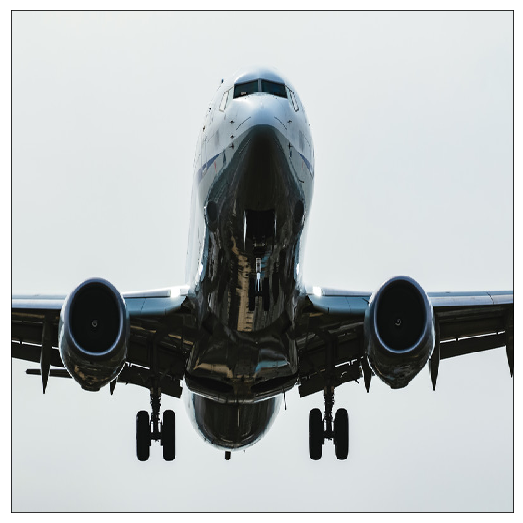

In [93]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

num = 1
for i in range(num):
    fig = plt.figure(figsize=(9, 15))
    ax = fig.add_subplot(num,1, i+1, xticks=[], yticks=[])
    ax.imshow(input_img[i])
    

<Figure size 648x1080 with 0 Axes>

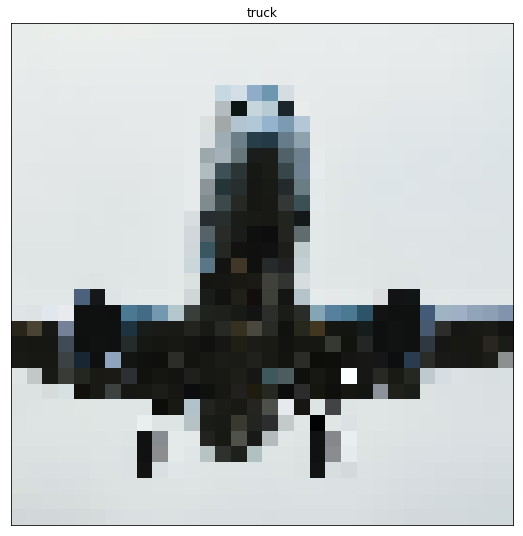

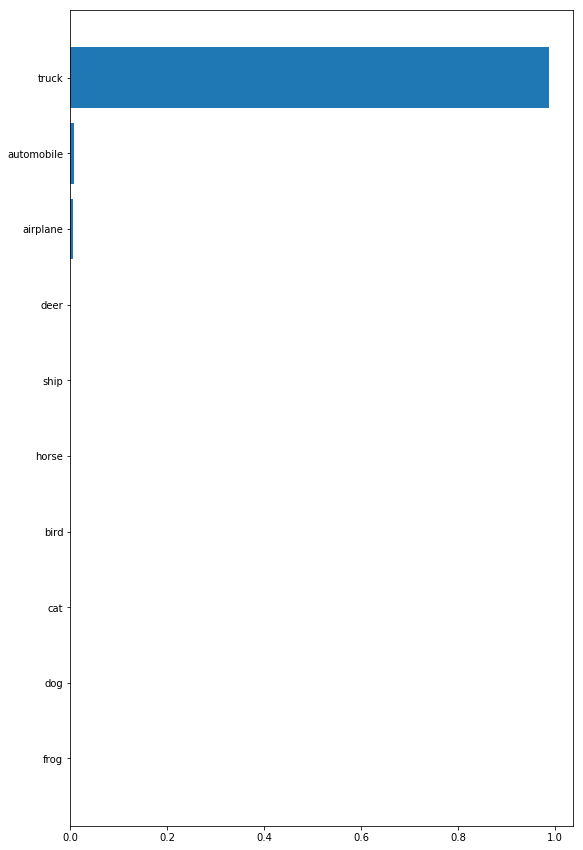

In [89]:
y_pred = model.predict(input_img)
y_proba = model.predict_proba(input_img)
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

num = 1
for i in range(num):
    fig = plt.figure(figsize=(9, 15))
    y = y_pred[i].argmax()
    ax = fig.add_subplot(num,1, i+1, xticks=[], yticks=[])
    ax.imshow(input_img[i])
    plt.title(cifar10_labels[np.argmax(y_pred[i])])
    fig = plt.figure(figsize=(9, 15))
    plt.barh(np.arange(0,10),y_proba[i][y_proba[i].argsort()[::1]])
    plt.yticks(np.arange(0,10),cifar10_labels[y_proba[i].argsort()[::1]])
    plt.show()